In [14]:
# Data Mining - TP3
from sklearn import datasets

#importing the dataset
irisData = datasets.load_iris()
# .data the 4 features of iris DataSet
print (irisData.data[:9])
# .target the 3 classes of iris DataSet
print (irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# Print the features' names and target names
print(irisData.feature_names)
print(irisData.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [16]:
# Counter allows us to count the number of occurences of each target category in the dataset
from collections import Counter
Counter(irisData.target)

Counter({0: 50, 1: 50, 2: 50})

In [17]:
# Print the 32nd element of the dataset (features + target class)
print(irisData.data[31],irisData.target[31])


[5.4 3.4 1.5 0.4] 0


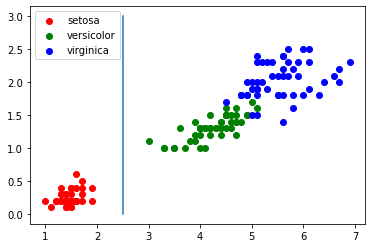

In [18]:
# Matplotlib is a library used for creating static, animated, and interactive visualizations in Python
import matplotlib
# Pylab = a library to facilitate the use of matplotlib
import pylab as pl
# Cycle is a tool to define a circular sequence of colors
from itertools import cycle

def plot_2D(data, target, target_names):
  colors = cycle('rgbcmykw') # A cycle of colors: a color for each class (red, green, blue, cyan...)
  target_ids = range(len(target_names)) #target_ids=3
  pl.figure()
  # To use multiple iterators, use zip on different iterable objects
  for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i, 2], data[target == i,3], c=c, label=label) #for each target i (1,2,3) we're gonna select the attributesfor the couple 2 and 3 
  pl.legend()
  pl.plot([2.5,2.5], [0,3]) # Define a line using two points: ([x1,x2], [y1,y2]) to separate class 0 from classes 1 and 2
  pl.show()

#call of the function 
plot_2D(irisData.data, irisData.target, irisData.target_names)

In [19]:
# Importing the model Naive-Bayes
from sklearn import naive_bayes
#The MultinomialNB Naive-Bayes classifier is an algorithm used when we have multiple target classes
nbModel = naive_bayes.MultinomialNB(fit_prior=True) # fit_prior=True Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
irisData = datasets.load_iris()
nbModel.fit(irisData.data, irisData.target)
# Let's predict the target class of the 32nd element in the dataset
p31 = nbModel.predict([irisData.data[31]])
print("-predicting the class of the 32nd element",p31)

# Now predict the target class of the last element in the dataset
plast = nbModel.predict([irisData.data[-1]])
print("-predicting the class of the last element",plast)
#predict all the data 
p = nbModel.predict(irisData.data[:])
print("-predicting the class of all of the elements\n",p) # If all classified correctly => possibility of overfitting

print("-accuracy score",nbModel.score(irisData.data, irisData.target)) #the score(Xtrain,Ytrain) method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds)

-predicting the class of the 32nd element [0]
-predicting the class of the last element [2]
-predicting the class of all of the elements
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
-accuracy score 0.9533333333333334


In [20]:
#train the model only on classes 0 and 1 and test them on data of class 2 (obtain thus class 1 the most similair one)
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99]) # Model only learned classes 0 and 1 
nb.predict(irisData.data[100:149]) # Class 2 has more similar features to Class1 than Class0 (see graph), thus the model predicted Class1 not Class0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [21]:
# Calculate the number of incorrectly classified instances manually
ea = 0
for i in range(len(irisData.data)):
  if (p[i] != irisData.target[i]):
    ea = ea+1
print(ea/len(irisData.data)*100, '%')

4.666666666666667 %


In [22]:
# Or we can use numpy's count_nonzero
import numpy as np
print("nombre d'instances incorectement classifiés",np.count_nonzero(p-irisData.target)) # Count the number of incorrectly classified instances
print("taux d'erreur",np.count_nonzero(p-irisData.target)/150 *100,"%")
np.nonzero(p-irisData.target)[0] # Indices of incorrectly classified instances in the training dataset

nombre d'instances incorectement classifiés 7
taux d'erreur 4.666666666666667 %


array([ 68,  70,  72,  83, 129, 131, 133])

In [23]:
accuracy= nbModel.score(irisData.data, irisData.target)
print("taux d'erreur",(1-accuracy)*100,"%")



taux d'erreur 4.666666666666663 %


In [24]:
from numpy.random import randint

# Define a function that performs a train-test split, with 2/3 of the data for training and 1/3 for test
def split(dataset):
  dataS1=[]
  targetS1=[]
  dataS2=[]
  targetS2=[]
  for i in range(100):
    k=randint(low=0, high=150)
    dataS1.append(dataset.data[k])
    targetS1.append(dataset.target[k])
  for i in range(50):
    k1=randint(low=0, high=150)
    dataS2.append(dataset.data[k1])
    targetS2.append(dataset.target[k1])
  return [dataS1, targetS1, dataS2, targetS2]
print(split(irisData))

[[array([5.8, 2.7, 3.9, 1.2]), array([5.5, 3.5, 1.3, 0.2]), array([6.5, 3.2, 5.1, 2. ]), array([5.4, 3.4, 1.5, 0.4]), array([6.3, 3.4, 5.6, 2.4]), array([6.5, 3. , 5.8, 2.2]), array([6.5, 3.2, 5.1, 2. ]), array([6.4, 2.9, 4.3, 1.3]), array([4.6, 3.6, 1. , 0.2]), array([7.7, 3.8, 6.7, 2.2]), array([6.7, 3. , 5. , 1.7]), array([4.6, 3.1, 1.5, 0.2]), array([4.5, 2.3, 1.3, 0.3]), array([6.9, 3.2, 5.7, 2.3]), array([5.9, 3. , 5.1, 1.8]), array([6.2, 2.8, 4.8, 1.8]), array([6.6, 3. , 4.4, 1.4]), array([6.3, 3.3, 6. , 2.5]), array([5.8, 4. , 1.2, 0.2]), array([7.7, 3.8, 6.7, 2.2]), array([7.2, 3. , 5.8, 1.6]), array([5.4, 3.4, 1.5, 0.4]), array([6.7, 2.5, 5.8, 1.8]), array([5.4, 3.4, 1.7, 0.2]), array([4.8, 3. , 1.4, 0.3]), array([6.4, 2.7, 5.3, 1.9]), array([6.2, 2.2, 4.5, 1.5]), array([4.7, 3.2, 1.6, 0.2]), array([5. , 3.5, 1.6, 0.6]), array([5.6, 3. , 4.1, 1.3]), array([4.6, 3.2, 1.4, 0.2]), array([5.2, 3.4, 1.4, 0.2]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3.1, 4.4, 1.4]), array([6.7, 

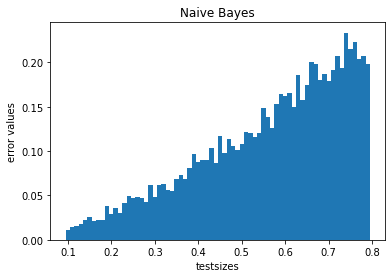

Optimal test size:  0.1
Best accuracy:  0.9892

**************************************************



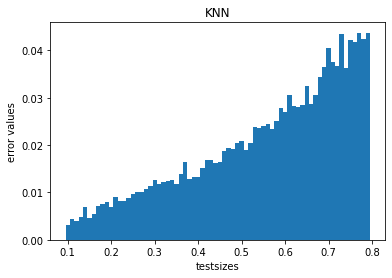

Optimal test size:  0.1
Best accuracy:  0.9969333333333333

**************************************************



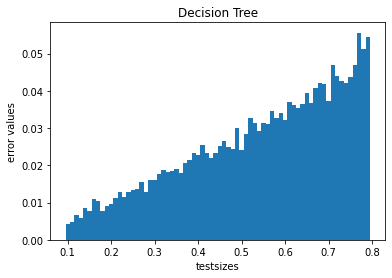

Optimal test size:  0.1
Best accuracy:  0.9958666666666667

**************************************************



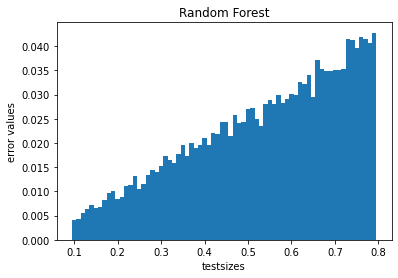

Optimal test size:  0.1
Best accuracy:  0.9958666666666667

**************************************************



In [26]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate


#the function will get the pourcentage of test data and return the test error
def testSplitting(data,target,pourcentage,model):
    
    dataTrain,dataTest,TargetTrain,TargetTest = train_test_split(data,target,test_size=pourcentage,)
    model.fit(dataTrain, TargetTrain)
    pres = model.predict(dataTest)
    return np.count_nonzero(pres-TargetTest)/len(target)


#defining 4 models
models={
    "Naive Bayes": lambda : naive_bayes.MultinomialNB(fit_prior=True),
     "KNN": KNeighborsClassifier,
    "Decision Tree": DecisionTreeClassifier,
    "Random Forest": RandomForestClassifier
}



for model_name,model in models.items():
    testsizes=np.arange(0.1,0.8,0.01) # testsize from 10% 80% with step=10%
    finalerror={}
    for testsize in testsizes:
        error=np.array([])
        for i in range(50):          # the average of the erros for the training test split it changes randomly every time so we should calculate the mean
            m= model()
            error= np.append(error,testSplitting(irisData.data,irisData.target,testsize,m))
        finalerror[testsize]=error.mean()
    x=testsizes
    y=list(finalerror.values())
    plt.bar(x,y,width=0.01)
    plt.title(model_name)
    plt.xlabel("testsizes")
    plt.ylabel("error values")
    plt.show()
    #Print out the optimal test size and the according accuracy computed for each model 
    optimalTestSize = min(finalerror, key = finalerror.get)
    print("Optimal test size: ", optimalTestSize)
    bestAccuracy = 1 - finalerror[optimalTestSize]
    print("Best accuracy: ", bestAccuracy)
    print("\n" + '*'*50 + "\n")


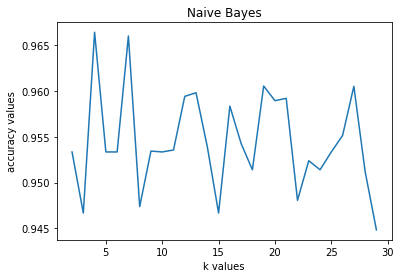

Optimal test size:  4
Best accuracy:  0.966394025604552

**************************************************



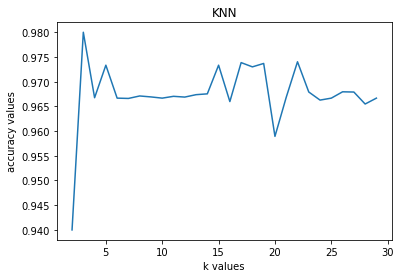

Optimal test size:  3
Best accuracy:  0.98

**************************************************



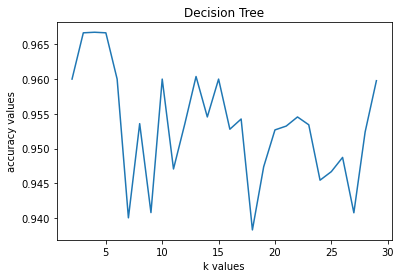

Optimal test size:  4
Best accuracy:  0.9667496443812233

**************************************************



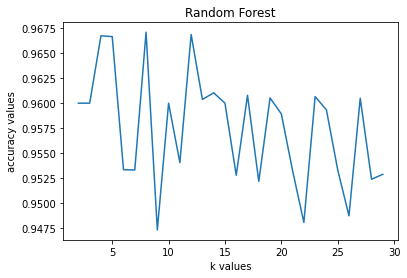

Optimal test size:  8
Best accuracy:  0.9671052631578947

**************************************************



In [28]:


#defining the function that takes the k option and the name model and returns the array errors of cross validation
def crossvalidation(data,target,folds,model):
    results=cross_validate(model,data,target,cv=folds)
    return(results['test_score'])


for model_name,model in models.items():
  folds = np.arange(2,30,1) #range of the K = {2,3,...,13,14}
  finalcross={}
  for fold in folds:
    m = model()
    finalcross[fold]=crossvalidation(irisData.data,irisData.target,fold,m).mean()
  x=folds
  y=list(finalcross.values())
  plt.plot(x,y)
  plt.title(model_name)
  plt.xlabel("k values")
  plt.ylabel("accuracy values")
  plt.show()
  #Print out the optimal test size and the according accuracy computed for each model 
  optimalTestSize = max(finalcross, key = finalcross.get)
  print("Optimal test size: ", optimalTestSize)
  bestAccuracy = finalcross[optimalTestSize]
  print("Best accuracy: ", bestAccuracy)
  print("\n" + '*'*50 + "\n")

